In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Manager\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_json("ultimate_data_challenge.json")

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.shape

(50000, 12)

In [5]:
df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [6]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Three columns have some missing value. It seems that they are not given by willfully,so we will replaced them with mean value.


In [8]:
df.avg_rating_of_driver=df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean())
df.avg_rating_by_driver=df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


# Target Variable
The target variable will be whether the user was active in the sixth month from January (June). Convert the signup date and last trip date to datetime objects then encode each user active in June as True, else False

In [10]:
#set as datatime objects
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

In [11]:
#encode target variable 'active' as true or false for last trip in june
df['active'] = [1 if x.month >= 6 else 0 for x in df.last_trip_date]
#encode ultimate_black_user as categorical 
df['ultimate_black_user'] = [1 if x == True else 0 for x in df.ultimate_black_user]
df = df.drop(['last_trip_date', 'signup_date'], axis =1)

#  Histogram of Active Users to Inactive Users

[]

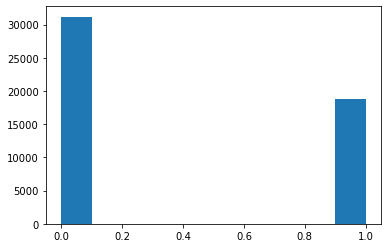

In [13]:
plt.hist(df.active)
plt.plot()


In [14]:
#%active users
a=sum(df.active)/len(df.active)

In [15]:
a

0.37608

This is the percentage of active user

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

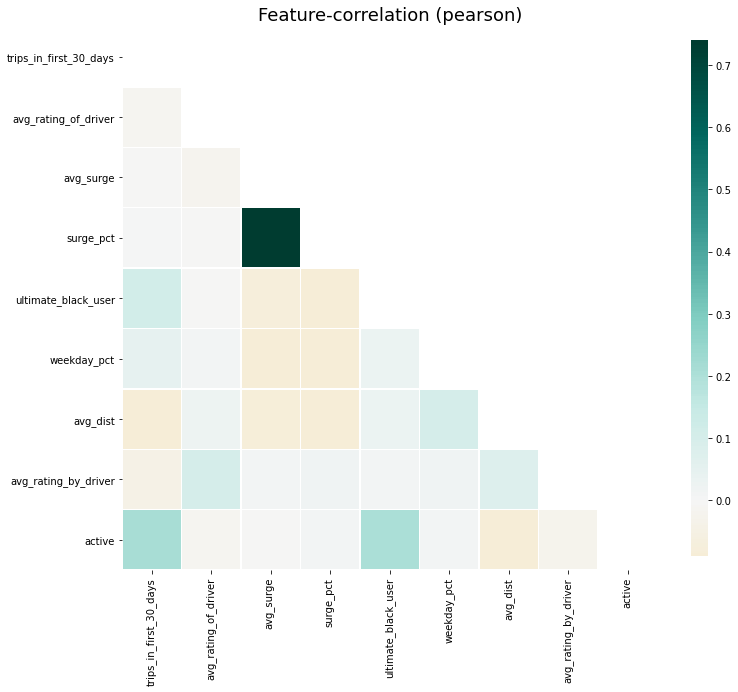

In [21]:
import klib
klib.corr_plot(df,annot=False)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

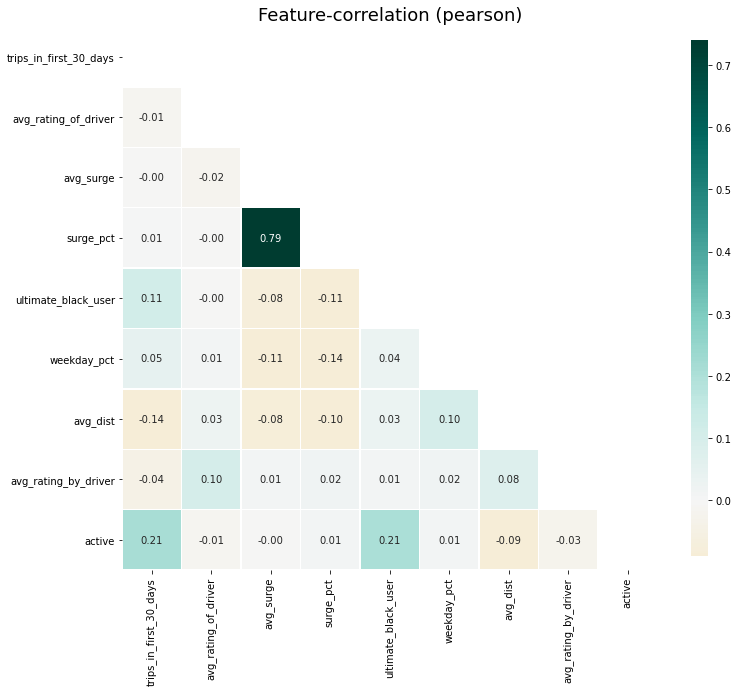

In [22]:
klib.corr_plot(df)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

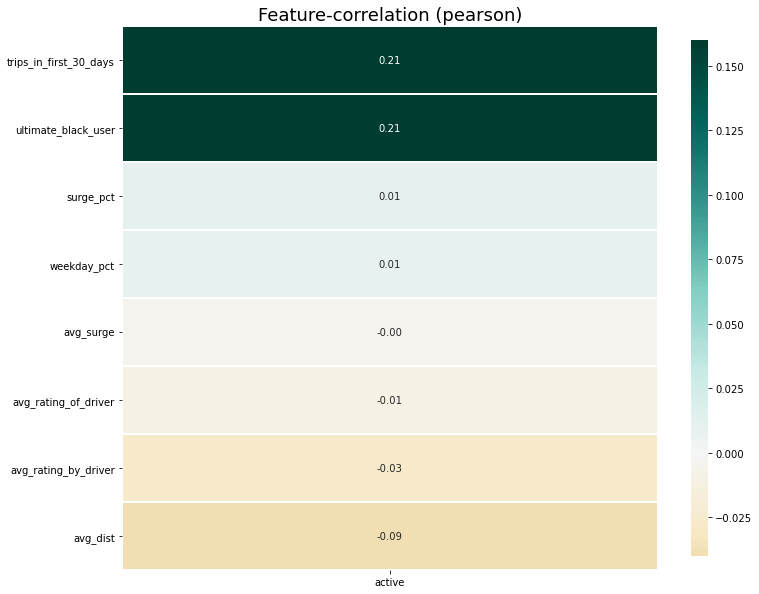

In [23]:
#correlation with respect to target varibale
klib.corr_plot(df,target='active')

<AxesSubplot:xlabel='trips_in_first_30_days'>

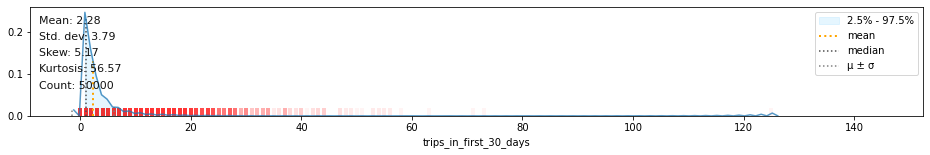

In [25]:
#distribution plot of columns of interset
klib.dist_plot(df['trips_in_first_30_days'])

GridSpec(6, 2)

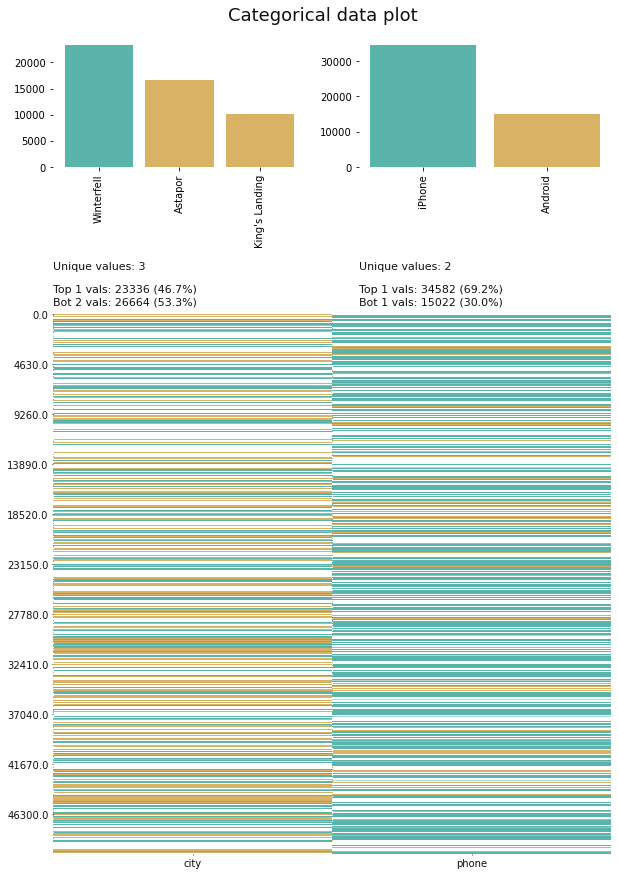

In [27]:
#categorical plot
klib.cat_plot(df,figsize=(10,15))

# Convert Discrete Variables to numerical
Discrete Variables must be encoded in order to work with continuous data for Kneighbors. To make this work, only pd.get_dummies is necessary.

In [28]:
df = pd.get_dummies(df)
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0


# PART3 MODELING
Generally speaking Kneighbors is not the best algorithm for prediciton, but it fits the needs of this data set, and will be easy to interpret when the time comes. Begin by splitting into train and test sets and normalize both seperately.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

#seperate data and labels
data = df.drop('active', axis=1)
labels = df.active

#split .33 to .67
X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#normalize both sets post-split
X_train = normalize(X_train)
y_train = normalize(y_train)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#lets try the out of the box classifier with 10 neighbors
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, X_test)

#test the accuracy
knn.score(y_train, y_test)

0.7476363636363637

This is fairly promising to see from an out of the box classifier. This accuracy is about equivalent to rolling a 4 sided dice with 3/4 positive outcomes. Next step is to cross-validate the model and tune its parameters, which can be done in a single step.

In [31]:
from sklearn.model_selection import GridSearchCV

#specify a parameter grid to search over
parameters = {
    'n_neighbors': [10, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

knn_cv = GridSearchCV(knn, parameters, cv=5) #specify GridSearchCV object

knn_cv.fit(X_train, X_test) #fit to training data


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [10, 13, 15],
                         'weights': ['uniform', 'distance']})

In [32]:
#find classifiers best parameters
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

So far the manhattan distance with 13 neighbors and uniform weighting are the best options.

In [33]:
#check for accuracy improvement
knn_cv.score(y_train, y_test)


0.7587878787878788

And cross validation managed to squeeze an extra percent out of the test data, which is quite good.

# Model Performance
The bottom line here is: Was the model useful? First check some of the critical metrics

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

#predict classifications
y_pred = knn_cv.predict(y_train)

print(classification_report(y_test, y_pred)) # print classification report and confusion matrix

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81     10305
           1       0.71      0.61      0.66      6195

    accuracy                           0.76     16500
   macro avg       0.75      0.73      0.74     16500
weighted avg       0.75      0.76      0.75     16500

confusion matrix:
[[8720 1585]
 [2395 3800]]


Based on the matrix above, it is clear that the model is much better at predicting a user who will go inactive over a user who will remain active in their sixth month. This is likely due to the class support and less likely due to the intrinsic value of the data. The reason I say that is because the percision of the 'active' predictions is fairly high, but recall is suffering because the model is failing to notice preditive features of the 'active' class. For a better idea of the overall performace of the model, refer to the ROC curve below.

C:\Users\Manager\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


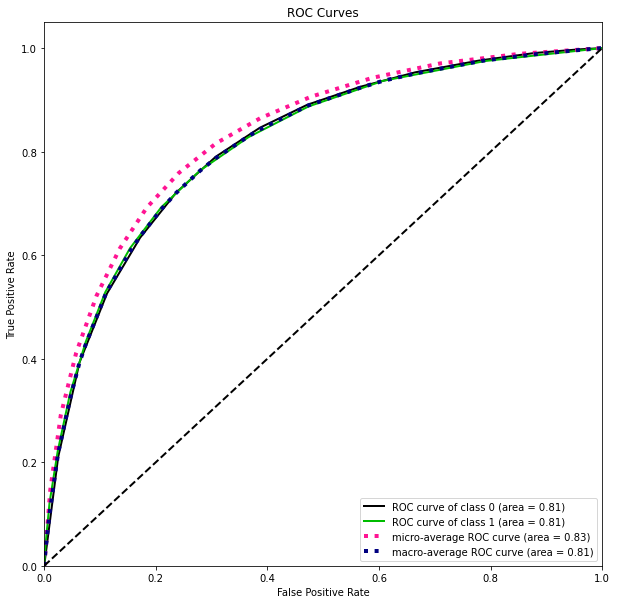

AUC score: 0.7297945354343844


In [36]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

#plot roc curve and  print AUV score
y_probas = knn_cv.predict_proba(y_train)
skplt.metrics.plot_roc_curve(y_test, y_probas, figsize=(10,10))
plt.show()
print('AUC score: {}'.format(roc_auc_score(y_test, y_pred)))

AUC score: 0.7297945354343844
What this curve visualizes, and the AUC score indicates, is that this model is about 25% better than flipping a coin at random in terms of predicting whether users will be active in the 6th month. Again, that is about the odds of rolling a 4-sided dice with 3/4 positive outcomes (or a 1 in 4 chance on average that it will be wrong). Of course that is not to ignore the fact that the f1-score for predicting an active user was merely 66% which is only 16% higher than random guessing.

# IMPLICATIONS:
One might think "16% better than guessing is not very useful nor helpful" but that depends on how you frame the problem. For instance, one might benefit from asking the question "do I want to know for sure that a user will be active in 6 months, or do I want to know for sure that a user will be inactive in 6 months?" In other words, it might be more helpful to know why users are leaving than why they are staying. By exploring the implications of the model, that question might be reasonably answered.

# Feature Importance
By using cross-validation and testing each feature individually, each individual feature can be observed for its effect on the model performance.

In [37]:
from sklearn.model_selection import cross_val_score

#instate a new classifier 

#to be used as index for feature number
n_feats = data.shape[1]

#loop over each feature, cross validate and print score
print('Feature  Accuracy')
for i in range(n_feats):
    X = data.iloc[:, i].values.reshape(-1, 1)
    knn_feat_test = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='manhattan')
    scores = cross_val_score(knn_feat_test, X, labels)
    print('%d        %g' % (i, scores.mean()))

Feature  Accuracy
0        0.63902
1        0.68226
2        0.70434
3        0.71518
4        0.62362
5        0.72672
6        0.59292
7        0.7067
8        0.57282
9        0.67584
10        0.53038
11        0.62392
12        0.59754


So thanks to cross-validation it is apparent that the main features of this data set (in terms of the target variable) are feature 3, 4, and 7 (avg_surge, surge_pct, and weekday_pct). Looking at these variables in terms of the target variable might reveal details about users who remain active.

Text(0.5, 1.0, 'weekday_pct for users active @ 6 months')

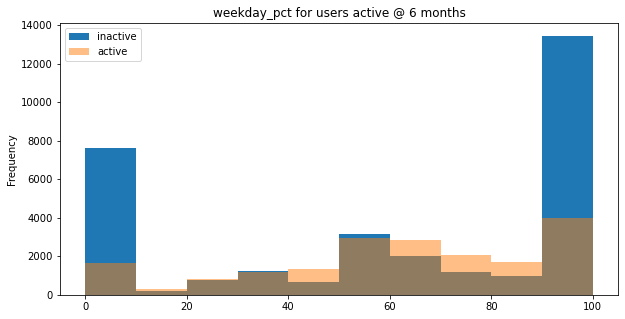

In [38]:
#subset active and inactive users for feature 7
feat_7_active = df.weekday_pct.loc[df['active'] == 1]
feat_7_inactive = df.weekday_pct.loc[df['active'] == 0]

plt.figure(figsize=(10,5))

#plot
feat_7_inactive.plot(kind='hist')
feat_7_active.plot(kind='hist', alpha=0.5)
plt.legend(['inactive', 'active'])
plt.title('weekday_pct for users active @ 6 months' )

For both classes, there are users who ride exclusively during the weekdays or during the weekends, but a mix of both was a better marker for users who will be active @ 6 months. Since the model recognized users who became inactive @ 6 months, it is likely that being an exclusive weekender or exclusive weekdayer is a strong marker of potential user loss. The same breakdown for features 3 and 4 are below, but without a more in-depth explaination about their meaning, I cannot offer an decent explaination for their effect on model.

Features 3 and 4 (ave_surge and surge_pct) are harder to interpret. Since I don't understand their meaning in context to the data I cannot comment on their exact implications for the model.